In [3]:
df.date

0      1949-01-01
1      1949-02-01
2      1949-03-01
3      1949-04-01
4      1949-05-01
          ...    
139    1960-08-01
140    1960-09-01
141    1960-10-01
142    1960-11-01
143    1960-12-01
Name: date, Length: 144, dtype: object

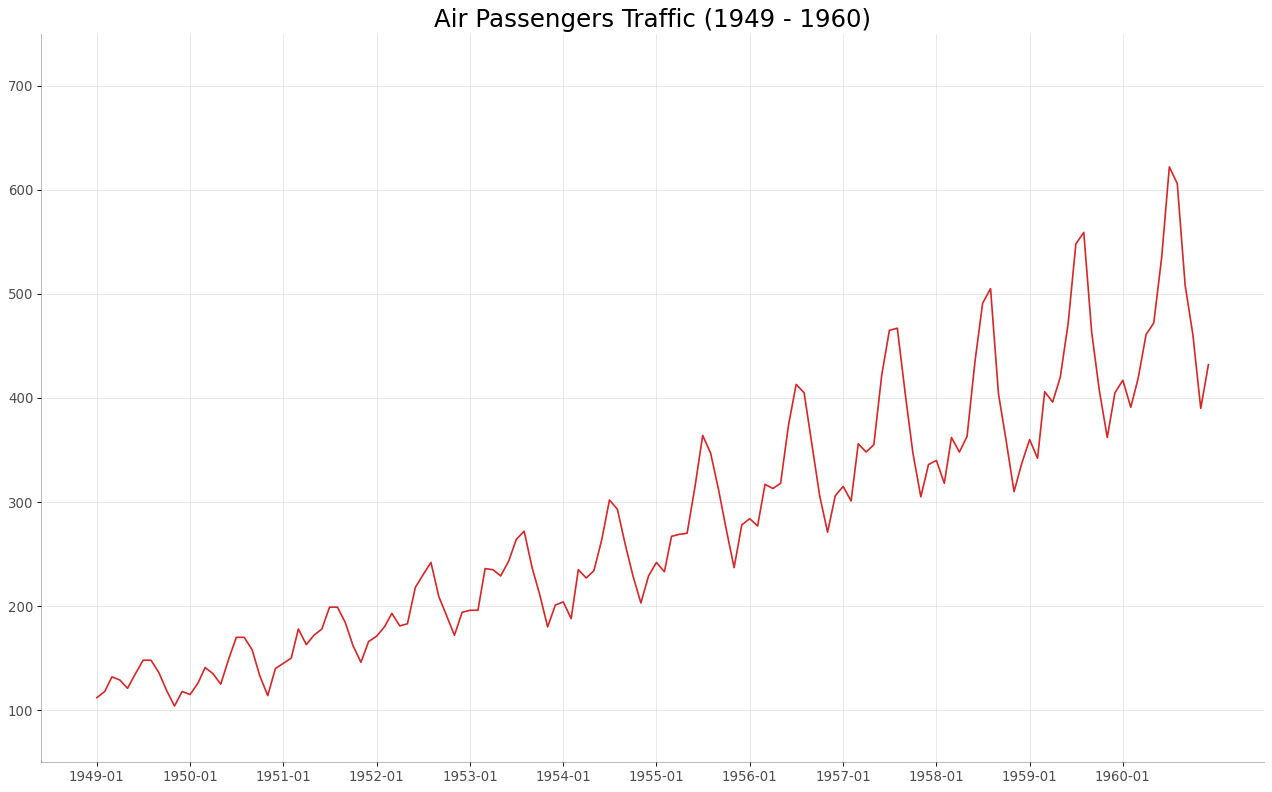

In [13]:
# plot the Airpassengers data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True)

# Draw high quality plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot(df.index, df['value'], color='tab:red')

# Decoration
plt.ylim(50,750)
xtick_location = df.index[::12]
xtick_labels = [x.strftime('%Y-%m') for x in xtick_location]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1960)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
# plt.show()
plt.tight_layout()
# save the plot
plt.savefig('AirPassengers.png')


In [9]:
xtick_location + ['1961-01-01']

DatetimeIndex(['1949-01-01', '1950-01-01', '1951-01-01', '1952-01-01',
               '1953-01-01', '1954-01-01', '1955-01-01', '1956-01-01',
               '1957-01-01', '1958-01-01', '1959-01-01', '1960-01-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

In [3]:
import yaml

def update_env_yml(conda_install_str, yml_file_path):
    # Remove 'conda install' from the string and split by '-c' to separate channels
    conda_install_str = conda_install_str.replace('conda install', '').strip()
    parts = conda_install_str.split(' -c ')
    
    # The first part contains packages, the rest are channels
    packages_part = parts[0].strip()
    packages = packages_part.split()
    
    channels = [channel.strip() for channel in parts[1:]]
    
    # Load the existing environment.yml file
    with open(yml_file_path, 'r') as file:
        env_data = yaml.safe_load(file)
    
    # Update the dependencies and channels
    if 'dependencies' not in env_data:
        env_data['dependencies'] = []
    
    for package in packages:
        if package not in env_data['dependencies']:
            env_data['dependencies'].append(package)
    
    if 'channels' not in env_data:
        env_data['channels'] = []
    
    for channel in channels:
        if channel not in env_data['channels']:
            env_data['channels'].append(channel)
    
    # Save the updated environment.yml file
    new_yml_file_path = yml_file_path.replace('.yml', '_updated.yml')
    with open(new_yml_file_path, 'w') as file:
        yaml.safe_dump(env_data, file, default_flow_style=False)
    
    return new_yml_file_path

In [4]:
# Example usage:
conda_install_str = "conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia"
yml_file_path = "anaconda_env.yml"
new_yml_file_path = update_env_yml(conda_install_str, yml_file_path)

In [8]:
import torch
import torch.nn as nn

In [21]:
context_window=5
forecast_horizon = 3
n_timeseries = 10
batch_size = 32

sample_data = torch.randn(batch_size, context_window, n_time_series)

In [22]:
# Declare nn.Linear for each channel
layers = nn.ModuleList([nn.Linear(context_window, forecast_horizon) for _ in range(n_timeseries)])


In [24]:
forecast = [layers[i](sample_data[:,:,i]) for i in range(n_timeseries)]

In [27]:
trend_layers = nn.ModuleList([nn.Linear(context_window, forecast_horizon) for _ in range(n_timeseries)])
seasonality_layers = nn.ModuleList([nn.Linear(context_window, forecast_horizon) for _ in range(n_timeseries)])


In [28]:
trend, seasonality = torch.randn(batch_size, context_window, n_time_series), torch.randn(batch_size, context_window, n_time_series)

In [32]:
trend_forecast = [trend_layers[i]( trend[:,:,i]) for i in range(n_timeseries)]
seasonality_forecast = [seasonality_layers[i]( seasonality [:,:,i]) for i in range(n_timeseries)]

In [35]:
forecast = [trend_forecast[i] + seasonality_forecast[i] for i in range(n_timeseries)]

In [38]:
forecast[0].shape

torch.Size([32, 3])

In [40]:
layers = nn.ModuleList([nn.Linear(context_window, forecast_horizon) for _ in range(n_timeseries)])

In [47]:
last_value = sample_data[:,-1:,:]
norm_ts = sample_data - last_value
output = [layers[i](norm_ts[:,:,i]) for i in range(n_timeseries)]
forecast = [o + last_value[:,:,i] for i, o in enumerate(output)]